# OKTAVIAN Lithium Fluoride benchmark analysis
Add description

In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

import helpers

### Extract experimental and codes results from results_database


In [2]:
# read conderc data
experiment_file = ofb.ResultsFromDatabase('results_database/experiment.h5')

In [3]:
# read openmc results in results_database/
openmc_endfb80_file = ofb.ResultsFromDatabase('results_database/openmc-0-14-0_endfb80.h5')
openmc_jeff33_file = ofb.ResultsFromDatabase('results_database/openmc-0-14-0_jeff33.h5')
openmc_fendl32_file = ofb.ResultsFromDatabase('results_database/openmc-0-14-0_fendl32.h5')

In [4]:
# read mcnp results in results_database/
mcnp_endfb80_file = ofb.ResultsFromDatabase('results_database/mcnp-6-1-1b_endfb80.h5')
mcnp_jeff33_file = ofb.ResultsFromDatabase('results_database/mcnp-6-1-1b_jeff33.h5')
mcnp_jendl40_file = ofb.ResultsFromDatabase('results_database/mcnp-6-2-17_jendl40.h5')
mcnp_tendl17_file = ofb.ResultsFromDatabase('results_database/mcnp-6-1-1b_tendl17.h5')

### Spectrometers - neutron energy spectra
Neutron energy spectra between 30 keV and 15 MeV measured by the time-of-flight technique using a 14 MeV  D-T neutron generator.

In [5]:
# experiment from results_database/
n21 = experiment_file.get_tally_dataframe('nspectrum')
g41 = experiment_file.get_tally_dataframe('gspectrum')

In [6]:
# openmc from results_database/
openmc_endfb80_n21 = openmc_endfb80_file.get_tally_dataframe('nspectrum')
openmc_endfb80_g41 = openmc_endfb80_file.get_tally_dataframe('gspectrum')

# openmc_jeff33_n21 = openmc_jeff33_file.get_tally_dataframe('nspectrum')
# openmc_jeff33_g41 = openmc_jeff33_file.get_tally_dataframe('gspectrum')

openmc_fendl32_n21 = openmc_fendl32_file.get_tally_dataframe('nspectrum')
openmc_fendl32_g41 = openmc_fendl32_file.get_tally_dataframe('gspectrum')

In [7]:
# # mcnp from results_database/
# mcnp_endfb80_n21 = mcnp_endfb80_file.get_tally_dataframe('nspectrum')
# mcnp_endfb80_g41 = mcnp_endfb80_file.get_tally_dataframe('gspectrum')

# mcnp_jeff33_n21 = mcnp_jeff33_file.get_tally_dataframe('nspectrum')
# mcnp_jeff33_g41 = mcnp_jeff33_file.get_tally_dataframe('gspectrum')

# mcnp_jendl40_n21 = mcnp_jendl40_file.get_tally_dataframe('nspectrum')
# mcnp_jendl40_g41 = mcnp_jendl40_file.get_tally_dataframe('gspectrum')

# mcnp_tendl17_n21 = mcnp_tendl17_file.get_tally_dataframe('nspectrum')
# mcnp_tendl17_g41 = mcnp_tendl17_file.get_tally_dataframe('gspectrum')

In [8]:
ylabel_n = r'Neutron flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'nspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

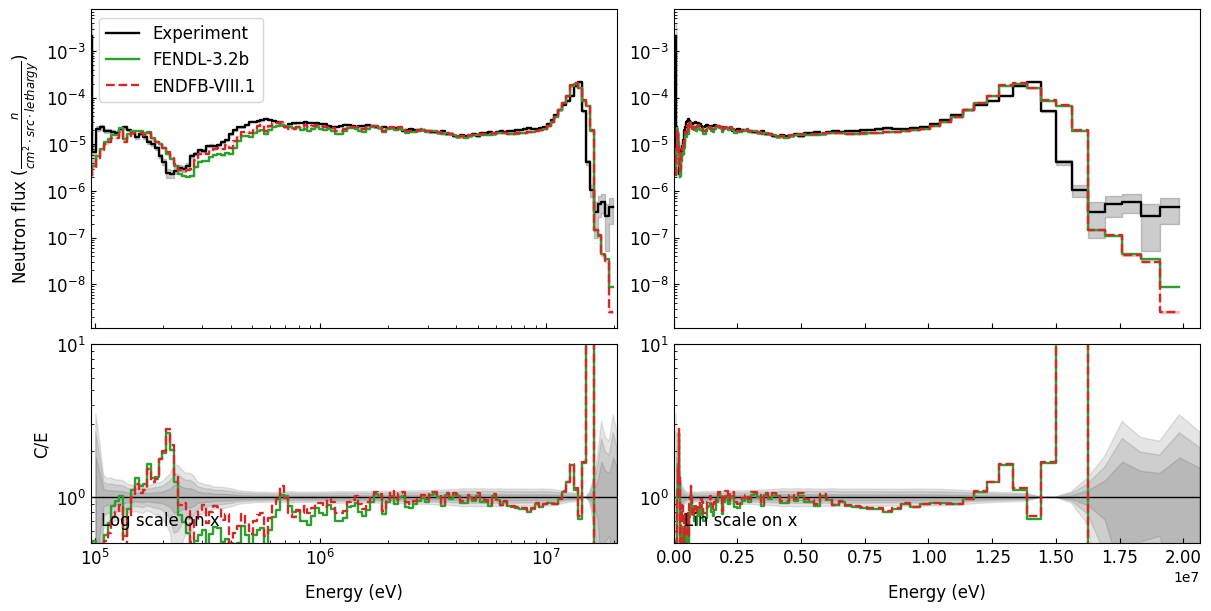

In [9]:
import math 

reference_data = ofb.rescale_to_lethargy(n21)
openmc_fendl32 = ofb.rescale_to_lethargy(openmc_fendl32_n21)
openmc_endfb80 = ofb.rescale_to_lethargy(openmc_endfb80_n21)
statepoint_endfb81 = ofb.ResultsFromOpenmc('results/statepoint_endfb81.100.h5')
openmc_endfb81 = ofb.rescale_to_lethargy(statepoint_endfb81.get_tally_dataframe('nspectrum', normalize_over=helpers.surface))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
for i in range(2):
    ax[i, 0].set_xscale('log')
    ax[0, i].set_yscale('log')
    ax[1, i].set_yscale('log')
    ax[1, i].set_ylim([0.5, 1e1])
    ax[0, i].tick_params(axis='x', labelbottom=False)
    ax[1, i].set_xlabel('Energy (eV)', fontsize=12)
    ax[1, i].xaxis.set_label_coords(0.5, -0.2)
    for j in range(2):
        ax[i, j].tick_params(
            axis='both', which='both', direction='in', labelsize=12)

ax[0, 0].set_ylabel(ylabel_n, fontsize=12)
ax[1, 0].set_ylabel('C/E', fontsize=12)

ax[1, 0].annotate("Log scale on x", [0.02, 0.07], xycoords='axes fraction',
                        horizontalalignment='left', verticalalignment='bottom', fontsize=12)
ax[1, 1].annotate("Lin scale on x", [0.02, 0.07], xycoords='axes fraction',
                        horizontalalignment='left', verticalalignment='bottom', fontsize=12)

# reference results
min_ebound, max_ebound = ofb.get_nonzero_energy_interval(reference_data)
min_oom = math.floor(math.log(min_ebound, 10))
max_oom = math.floor(math.log(max_ebound, 10))
for i in range(2):
    ax[0, i].step(reference_data['energy low [eV]'],
                        reference_data['mean'], ls='-', lw=1.7, c='k', alpha=1, label='Experiment')
    ax[0, i].fill_between(reference_data['energy low [eV]'], reference_data['mean'] - reference_data['std. dev.'], reference_data['mean'] +
                                reference_data['std. dev.'], step='pre', color='k', alpha=.2)

    ofb.plot_stddev_area(ax=ax[1, i], ticks=reference_data['energy high [eV]'], mean=np.ones(len(
        reference_data['mean'])), std_dev=reference_data['std. dev.']/reference_data['mean'])

    ax[1, i].hlines(1.0, 0, np.array(reference_data['energy high [eV]'])[
                            -1] + 5e6, colors='k', linestyles='-', linewidth=1, label='_')

    ax[i, 1].set_xlim([0, max_ebound + .1**max_oom])
    ax[i, 0].set_xlim(
        [max(min_ebound - .1*10**min_oom, .001), max_ebound + .1**max_oom])

ax[0, 0].legend(frameon=True, fontsize=12)


# fendl32
ce = openmc_fendl32['mean']/reference_data['mean']
color = 'tab:green'
ls = '-'
for i in range(2):
    ax[0, i].step(openmc_fendl32['energy low [eV]'],
                        openmc_fendl32['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="FENDL-3.2b")
    ax[0, i].fill_between(openmc_fendl32['energy low [eV]'], openmc_fendl32['mean'] - openmc_fendl32['std. dev.'], openmc_fendl32['mean'] +
                                openmc_fendl32['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_fendl32['energy low [eV]'], ce, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)

# endfb80
ce = openmc_endfb80['mean']/reference_data['mean']
color = 'tab:blue'
ls = '-'
for i in range(2):
    ax[0, i].step(openmc_endfb80['energy low [eV]'],
                        openmc_endfb80['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="ENDFB-VIII.0")
    ax[0, i].fill_between(openmc_endfb80['energy low [eV]'], openmc_endfb80['mean'] - openmc_endfb80['std. dev.'], openmc_endfb80['mean'] +
                                openmc_endfb80['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_endfb80['energy low [eV]'], ce, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)


# endfb81
ce = openmc_endfb81['mean']/reference_data['mean']
color = 'tab:red'
ls = '--'
for i in range(2):
    ax[0, i].step(openmc_endfb81['energy low [eV]'],
                        openmc_endfb81['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="ENDFB-VIII.1")
    ax[0, i].fill_between(openmc_endfb81['energy low [eV]'], openmc_endfb81['mean'] - openmc_endfb81['std. dev.'], openmc_endfb81['mean'] +
                                openmc_endfb81['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_endfb81['energy low [eV]'], ce, ls=ls, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)
# fig.savefig(f'figures/nspectrum_f32e81.png', dpi=300, bbox_inches="tight")

### Spectrometers - gamma energy spectra

In [10]:
ylabel_g = r'Gamma flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'gspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

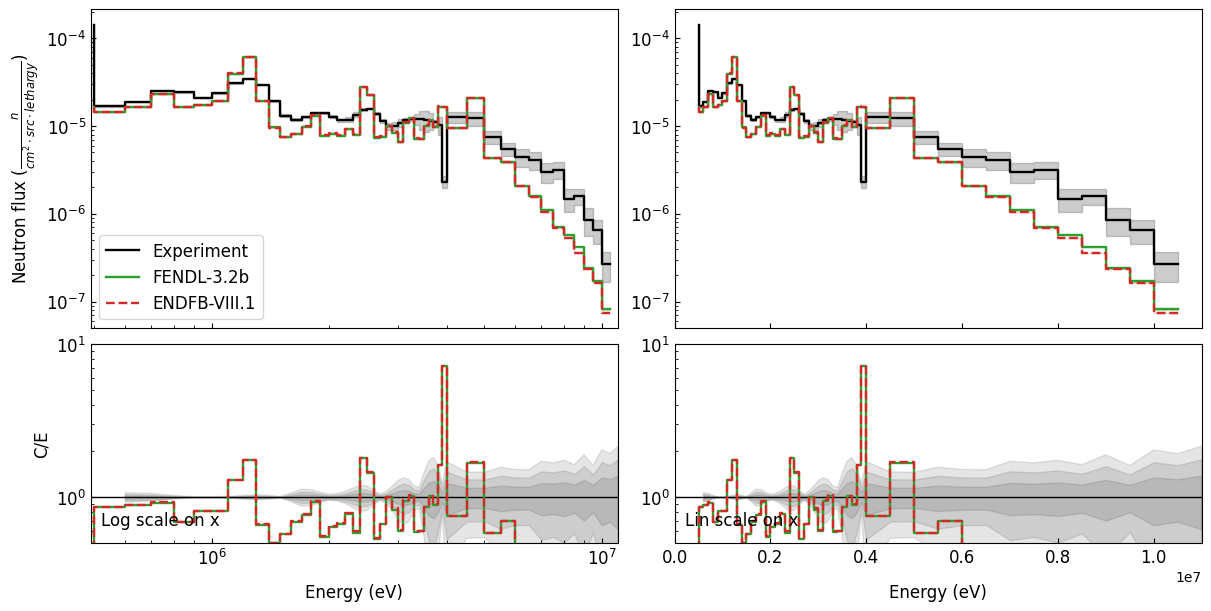

In [ ]:
import math 

reference_data = ofb.rescale_to_lethargy(g41)
openmc_fendl32 = ofb.rescale_to_lethargy(openmc_fendl32_g41)
openmc_endfb80 = ofb.rescale_to_lethargy(openmc_endfb80_g41)
statepoint_endfb81 = ofb.ResultsFromOpenmc('results/statepoint_endfb81.100.h5')
openmc_endfb81 = ofb.rescale_to_lethargy(statepoint_endfb81.get_tally_dataframe('gspectrum', normalize_over=helpers.surface))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
for i in range(2):
    ax[i, 0].set_xscale('log')
    ax[0, i].set_yscale('log')
    ax[1, i].set_yscale('log')
    ax[1, i].set_ylim([0.5, 1e1])
    ax[0, i].tick_params(axis='x', labelbottom=False)
    ax[1, i].set_xlabel('Energy (eV)', fontsize=12)
    ax[1, i].xaxis.set_label_coords(0.5, -0.2)
    for j in range(2):
        ax[i, j].tick_params(
            axis='both', which='both', direction='in', labelsize=12)

ax[0, 0].set_ylabel(ylabel_n, fontsize=12)
ax[1, 0].set_ylabel('C/E', fontsize=12)

ax[1, 0].annotate("Log scale on x", [0.02, 0.07], xycoords='axes fraction',
                        horizontalalignment='left', verticalalignment='bottom', fontsize=12)
ax[1, 1].annotate("Lin scale on x", [0.02, 0.07], xycoords='axes fraction',
                        horizontalalignment='left', verticalalignment='bottom', fontsize=12)

# reference results
min_ebound, max_ebound = ofb.get_nonzero_energy_interval(reference_data)
min_oom = math.floor(math.log(min_ebound, 10))
max_oom = math.floor(math.log(max_ebound, 10))
for i in range(2):
    ax[0, i].step(reference_data['energy low [eV]'],
                        reference_data['mean'], ls='-', lw=1.7, c='k', alpha=1, label='Experiment')
    ax[0, i].fill_between(reference_data['energy low [eV]'], reference_data['mean'] - reference_data['std. dev.'], reference_data['mean'] +
                                reference_data['std. dev.'], step='pre', color='k', alpha=.2)

    ofb.plot_stddev_area(ax=ax[1, i], ticks=reference_data['energy high [eV]'], mean=np.ones(len(
        reference_data['mean'])), std_dev=reference_data['std. dev.']/reference_data['mean'])

    ax[1, i].hlines(1.0, 0, np.array(reference_data['energy high [eV]'])[
                            -1] + 5e6, colors='k', linestyles='-', linewidth=1, label='_')

    ax[i, 1].set_xlim([0, max_ebound + .1**max_oom])
    ax[i, 0].set_xlim(
        [max(min_ebound - .1*10**min_oom, .001), max_ebound + .1**max_oom])

ax[0, 0].legend(frameon=True, fontsize=12)


# fendl32
ce = openmc_fendl32['mean']/reference_data['mean']
color = 'tab:green'
ls = '-'
for i in range(2):
    ax[0, i].step(openmc_fendl32['energy low [eV]'],
                        openmc_fendl32['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="FENDL-3.2b")
    ax[0, i].fill_between(openmc_fendl32['energy low [eV]'], openmc_fendl32['mean'] - openmc_fendl32['std. dev.'], openmc_fendl32['mean'] +
                                openmc_fendl32['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_fendl32['energy low [eV]'], ce, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)

# endfb80
ce = openmc_endfb80['mean']/reference_data['mean']
color = 'tab:blue'
ls = '-'
for i in range(2):
    ax[0, i].step(openmc_endfb80['energy low [eV]'],
                        openmc_endfb80['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="ENDFB-VIII.0")
    ax[0, i].fill_between(openmc_endfb80['energy low [eV]'], openmc_endfb80['mean'] - openmc_endfb80['std. dev.'], openmc_endfb80['mean'] +
                                openmc_endfb80['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_endfb80['energy low [eV]'], ce, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)


# endfb81
ce = openmc_endfb81['mean']/reference_data['mean']
color = 'tab:red'
ls = '--'
for i in range(2):
    ax[0, i].step(openmc_endfb81['energy low [eV]'],
                        openmc_endfb81['mean'], ls=ls, lw=1.7, c=color, alpha=1, label="ENDFB-VIII.1")
    ax[0, i].fill_between(openmc_endfb81['energy low [eV]'], openmc_endfb81['mean'] - openmc_endfb81['std. dev.'], openmc_endfb81['mean'] +
                                openmc_endfb81['std. dev.'], step='pre', color=color, alpha=.2)

    ax[1, i].step(openmc_endfb81['energy low [eV]'], ce, ls=ls, lw=1.7, c=color, alpha=1, label='_')

ax[0, 0].legend(frameon=True, fontsize=12)
# fig.savefig(f'figures/gspectrum_f32e81.png', dpi=300, bbox_inches="tight")

### References
Add references